# A Data-Driven Exploration of Video Game Sales over Four Decades

In [1]:
# Importing data libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Reading in data
# All sales in the dataset are in millions USD

df = pd.read_csv(r"C:\Users\mcbro\OneDrive\Desktop\video_games_sale\vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# Checking for data with N/A

print(df.isna().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [4]:
df = df.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
df['Year'] = df['Year'].astype(int)

C:\Users\mcbro\AppData\Local\Temp\ipykernel_10152\1186596301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


In [7]:
# Locating '2600' & changing it to 'Atari 2600'

temp_df = df.loc[df['Platform'] == '2600', ['Platform']]
temp_df

,Platform
89,2600
239,2600
258,2600
544,2600
734,2600
...,...
8758,2600
9106,2600
9495,2600
11716,2600


In [8]:
df['Platform'] = df['Platform'].replace('2600', 'Atari 2600')
df

C:\Users\mcbro\AppData\Local\Temp\ipykernel_10152\2371692256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Platform'] = df['Platform'].replace('2600', 'Atari 2600')


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
# Checking if changes were implemented properly

temp_df = df.loc[df['Platform'] == 'Atari 2600', ['Platform']]
temp_df

,Platform
89,Atari 2600
239,Atari 2600
258,Atari 2600
544,Atari 2600
734,Atari 2600
...,...
8758,Atari 2600
9106,Atari 2600
9495,Atari 2600
11716,Atari 2600


In [10]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [11]:
df.sort_values(by='NA_Sales', ascending = False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [12]:
df.sort_values(by='EU_Sales', ascending = False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


In [13]:
df.sort_values(by='JP_Sales', ascending = False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


In [14]:
# Limiting decimal placement to 2 decimals

pd.set_option('display.precision', 2)

In [15]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00,16291.00
mean,8290.19,2006.41,0.27,0.15,0.08,0.05,0.54
std,4792.65,5.83,0.82,0.51,0.31,0.19,1.57
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4132.50,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8292.00,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12439.50,2010.00,0.24,0.11,0.04,0.04,0.48
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [16]:
# Showing total unique values in each column
df.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [17]:
# Looking at correlation between columns

vgsale_corr = df.corr(method = 'pearson', min_periods = 2, numeric_only = True)
vgsale_corr

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.00,1.78e-01,-0.40,-3.79e-01,-0.27,-0.33,-0.43
Year,0.18,1.00e+00,-0.09,6.11e-03,-0.17,0.04,-0.07
NA_Sales,-0.40,-9.13e-02,1.00,7.69e-01,0.45,0.63,0.94
EU_Sales,-0.38,6.11e-03,0.77,1.00e+00,0.44,0.73,0.90
JP_Sales,-0.27,-1.69e-01,0.45,4.36e-01,1.00,0.29,0.61
Other_Sales,-0.33,4.11e-02,0.63,7.26e-01,0.29,1.00,0.75
Global_Sales,-0.43,-7.46e-02,0.94,9.03e-01,0.61,0.75,1.00


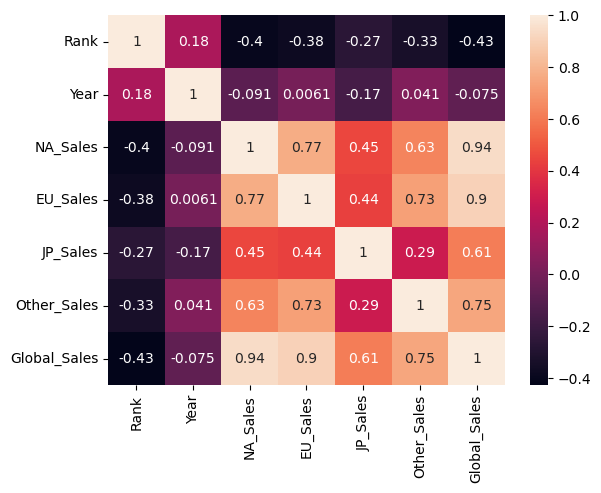

In [18]:
sns.heatmap(vgsale_corr, annot = True)

plt.rcParams['figure.figsize'] = (9,12)

plt.show()

In [19]:
# Grouping the data by Genre & showing the mean of sales across different regions

df2 = df.groupby('Genre').agg({'NA_Sales': 'mean', 'EU_Sales': 'mean',
                        'JP_Sales': 'mean', 'Other_Sales': 'mean'})

df2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.27,0.16,0.05,0.06
Adventure,0.08,0.05,0.04,0.01
Fighting,0.26,0.12,0.10,0.04
Misc,0.24,0.13,0.06,0.04
Platform,0.51,0.23,0.15,0.06
Puzzle,0.21,0.09,0.10,0.02
Racing,0.29,0.19,0.05,0.06
Role-Playing,0.22,0.13,0.24,0.04
Shooter,0.45,0.24,0.03,0.08


In [21]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-deep')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='Total Sales', ylabel='Genre'>

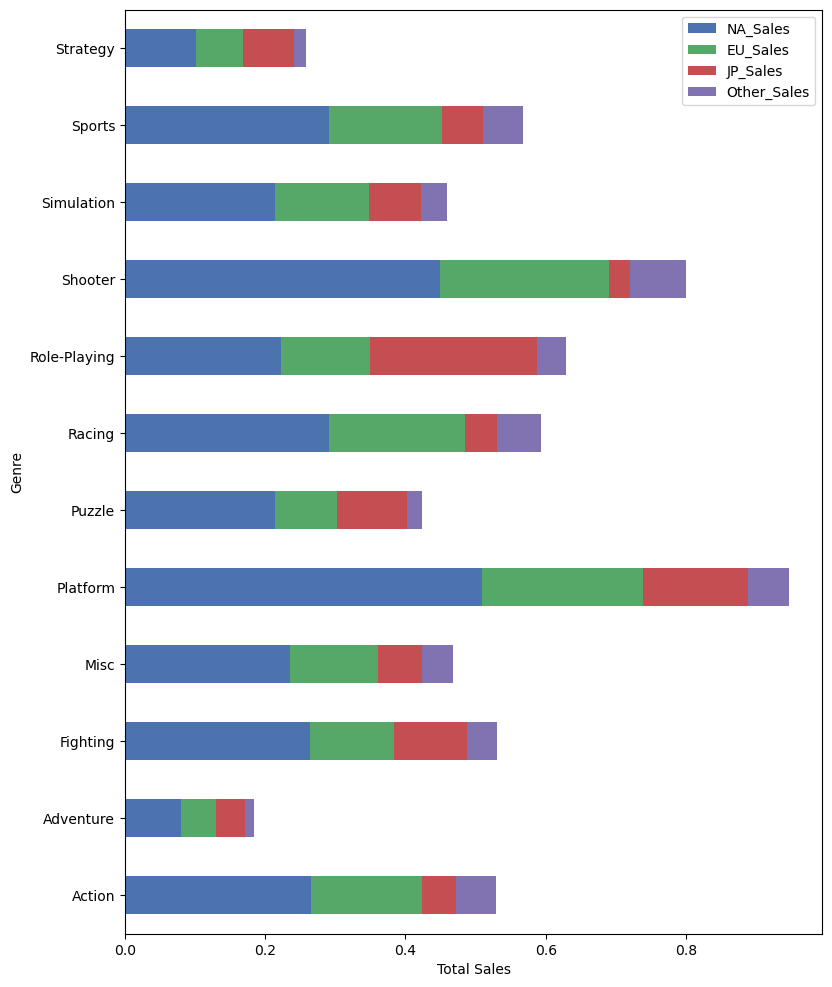

In [22]:
df2.plot.barh(xlabel = 'Total Sales', stacked=True)

In [32]:
# Created dataframes and counted the number of games made in each Genre for each decade

yr_80s = df[(df['Year'] >= 1980) & (df['Year'] < 1990)]
yr_90s = df[(df['Year'] >= 1990) & (df['Year'] < 2000)]
yr_00s = df[(df['Year'] >= 2000) & (df['Year'] < 2010)]
yr_10s = df[df['Year'] >= 2010]

decades = [yr_80s, yr_90s, yr_00s, yr_10s]
titles = ['Counts of Genre for the 1980s', 'Counts of Genre for the 1990s',
          'Counts of Genre for the 2000s', 'Counts of Genre for the 2010s']

for dec, title in zip(decades, titles):
    print('\033[1m' + title + '\033[0m')
    genre_counts = dec['Genre'].value_counts()
    print(genre_counts)
    print()

Counts of Genre for the 1980s
Action          66
Platform        33
Shooter         30
Sports          23
Puzzle          19
Role-Playing     9
Racing           8
Misc             8
Fighting         4
Simulation       3
Adventure        2
Name: Genre, dtype: int64

Counts of Genre for the 1990s
Sports          304
Fighting        193
Racing          183
Role-Playing    172
Action          162
Shooter         137
Platform        125
Strategy        123
Misc            116
Adventure        97
Simulation       86
Puzzle           71
Name: Genre, dtype: int64

Counts of Genre for the 2000s
Action          1585
Sports          1407
Misc             999
Racing           801
Role-Playing     732
Shooter          720
Adventure        633
Platform         567
Simulation       552
Fighting         442
Strategy         380
Puzzle           365
Name: Genre, dtype: int64

Counts of Genre for the 2010s
Action          1438
Sports           570
Misc             563
Role-Playing     557
Adventure     

In [24]:
# Counts the number of games made in each Platform (at or above 100)

pcount = df['Platform'].value_counts()

platform_counts = pcount[pcount >= 100]
platform_counts

DS            2131
PS2           2127
PS3           1304
Wii           1290
X360          1234
PSP           1197
PS            1189
PC             938
XB             803
GBA            786
GC             542
3DS            499
PSV            410
PS4            336
N64            316
SNES           239
XOne           213
SAT            173
WiiU           143
Atari 2600     116
Name: Platform, dtype: int64

<Axes: title={'center': 'Which Platforms Attracted Publishers Across Different Eras?'}, ylabel='Platform'>

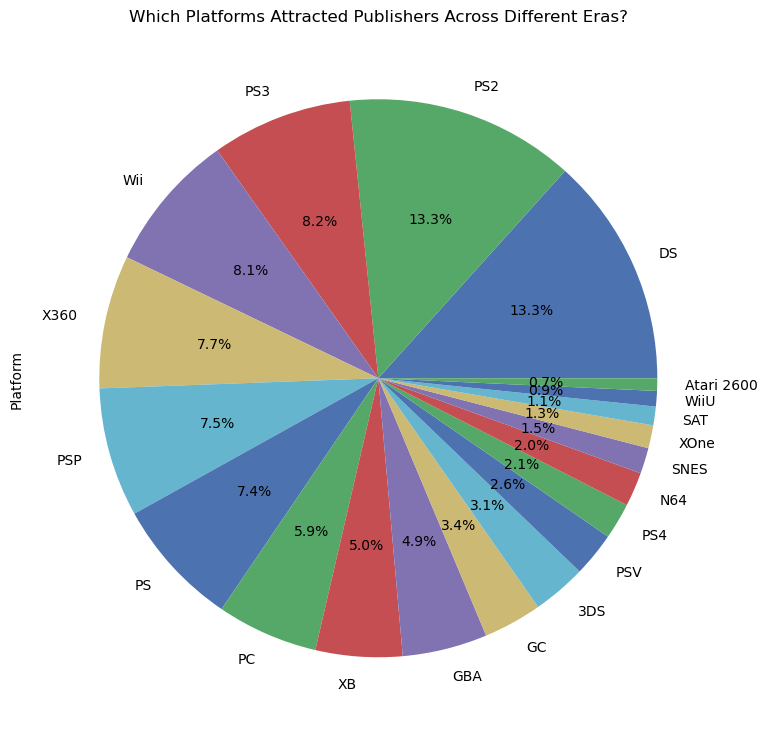

In [25]:
platform_counts.plot.pie(title = 'Which Platforms Attracted Publishers Across Different Eras?', 
                        autopct='%1.1f%%')

In [26]:
# Shows how many games certain companies have released over the last 4 decades

titles2 = ['Total Games Made by Publishers in the 1980s', 'Total Games Made by Publishers in the 1990s',
          'Total Games Made by Publishers in the 2000s', 'Total Games Made by Publishers in the 2010s']

thresholds = [4, 20, 150, 100]

for dec, title, thresh in zip(decades, titles2, thresholds):
    print('\033[1m' + title + '\033[0m')
    company_counts = dec['Publisher'].value_counts()
    company_counts = company_counts[company_counts > thresh]
    print(company_counts)
    print()

Total Games Made by Publishers in the 1980s
Nintendo                        47
Atari                           42
Activision                      26
Namco Bandai Games              12
Mattel Interactive               8
Capcom                           8
Parker Bros.                     7
Hudson Soft                      6
Konami Digital Entertainment     6
20th Century Fox Video Games     5
Coleco                           5
Name: Publisher, dtype: int64

Total Games Made by Publishers in the 1990s
Sony Computer Entertainment     155
Nintendo                        124
Konami Digital Entertainment    119
Sega                            115
Electronic Arts                 108
Acclaim Entertainment            77
Namco Bandai Games               76
Virgin Interactive               46
GT Interactive                   45
Capcom                           42
SquareSoft                       41
Psygnosis                        31
Activision                       30
Hudson Soft                 

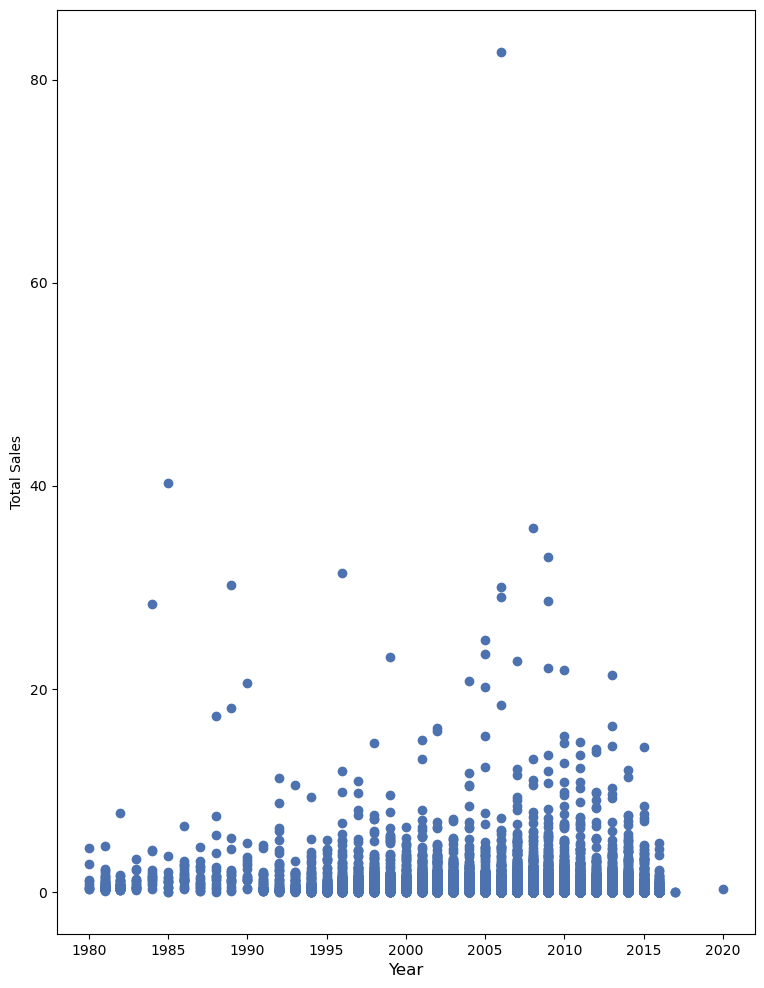

In [27]:
plt.scatter(df['Year'], df['Global_Sales'])

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=10)

plt.show()

In [28]:
# Created dataframe displaying games made during or after 2010 that had more than $1m Global Sales

df3 = df.loc[(df['Year'] >= 2010) & (df['Global_Sales'] > 1)]
df3

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...,...
2043,2045,God of War: Ghost of Sparta,PSP,2010,Action,Sony Computer Entertainment,0.41,0.36,0.03,0.21,1.01
2044,2046,Sonic Generations,3DS,2011,Platform,Sega,0.44,0.46,0.01,0.09,1.01
2048,2050,Guitar Hero: Warriors of Rock,Wii,2010,Misc,Activision,0.48,0.44,0.00,0.09,1.01
2051,2053,The LEGO Movie Videogame,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.48,0.02,0.18,1.01


<Figure size 1000x500 with 0 Axes>

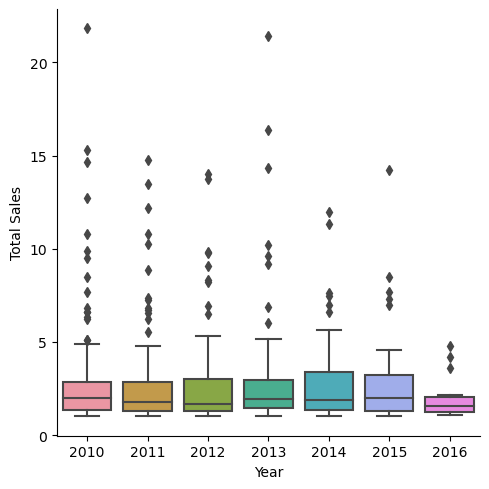

In [29]:
plt.figure(figsize=(10,5))

bplot = sns.catplot(data=df3, x='Year', y='Global_Sales', kind = 'box')
bplot.set_ylabels('Total Sales')

plt.show()